# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [3]:
df.shape

(1898, 9)

#### Observations:
The dataset has 1898 rows and 9 columns.

### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [4]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
*  All the columns have 1898 observations and there are no missing values in it
* 'restaurant_name', 'cuisine_type', 'day_of_the_week' should be categorical variables

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [5]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
df['restaurant_name'] = df.restaurant_name.astype('category')
df['cuisine_type'] = df.cuisine_type.astype('category')
df['day_of_the_week'] = df.day_of_the_week.astype('category')
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
* From the above,there are 3 categorical columns, 1 float64 column, 4 int64 column, 1 object column.


### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [6]:
df.describe() #shows summary of the dataframe only for numerical columns

order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000

##### Observations:
* The cost_of_the_order has a wide range,that indicates the data consists both low cost to costly orders.
* Most of the orders (customers) prefer low cost food
* Minimum time taken to prepare food is 20 minutes and maximum time goes upto 35 minutes
* Delivery of the order takes minimum time of 15 minutes and goes upto 33 minutes. 

### **Question 5:** How many orders are not rated? (0.5 mark)


#### Observations:
* before removing null values, the dataset had some of the ratings that were not rated.
* 736 orders are not rated , where (rating=Not given)

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

In [7]:
# In this analysis we are taking the numerical column as the input and return the boxplots and histograms for the variable.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """ Boxplot and histogram are combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7)) 
    kde: whether to show the density curve 
    bins: number of bins for histogram 
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize, # makes the plot wider
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="coral"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="dashed"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.axvline(
        data[feature].mode()[0], color="red", linestyle="dashed"
    ) # Add mode to the histogram


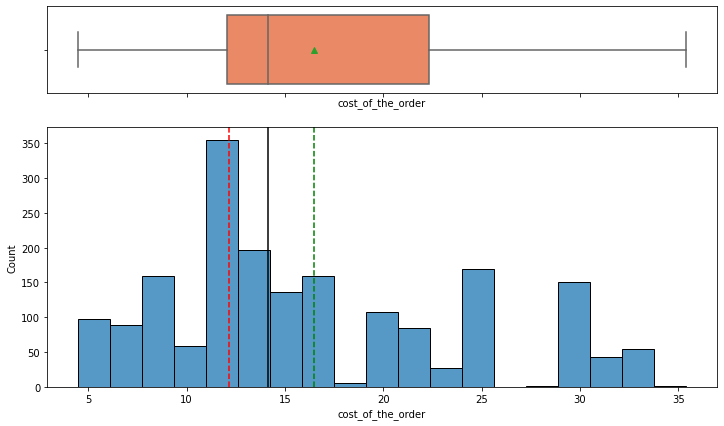

In [8]:
histogram_boxplot(df, 'cost_of_the_order')

#### Observations:
* The distribution of cost_of_the_order is positive skewed(right skewed) and has a heavy right tail.
* The mean value here is 16.49
* There are a no outliers in this variable. 
* The observations of cost_of_the_order starts from 4.47 to 35.41

In [9]:
histogram_boxplot(df, 'food_preparation_time')

#### Observations:
* The mean value here is 27.37 and median value is 27 (there is no difference between mean and median) 
* There are a no outliers in this variable.
* Most number of food preparation time is done in 21 minutes(based on the mode value) and it ranges between 20 minutes to 35 minutes.

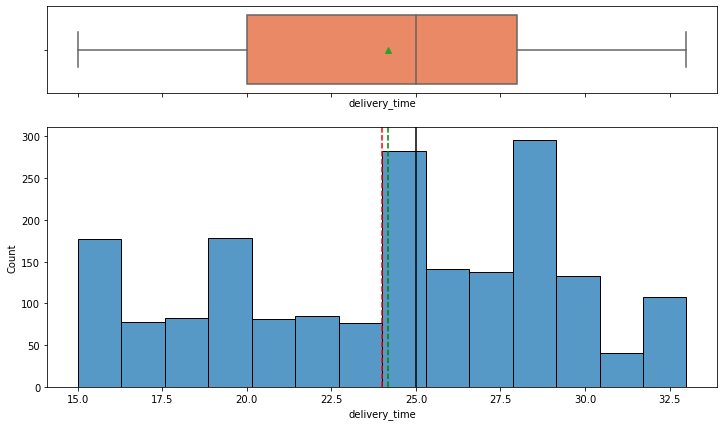

In [10]:
histogram_boxplot(df, 'delivery_time')

#### Observations:
* The distribution of delivery_time is left skewed(negative skewed).
* There are a no outliers in this variable.
* Most number of deliveries is done in 24 minutes.

In [11]:
# In this analysis we are taking the categorical column as the input and return barplots for the variable.
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count 
    n: displays the top n category levels 
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<Figure size 720x504 with 0 Axes>

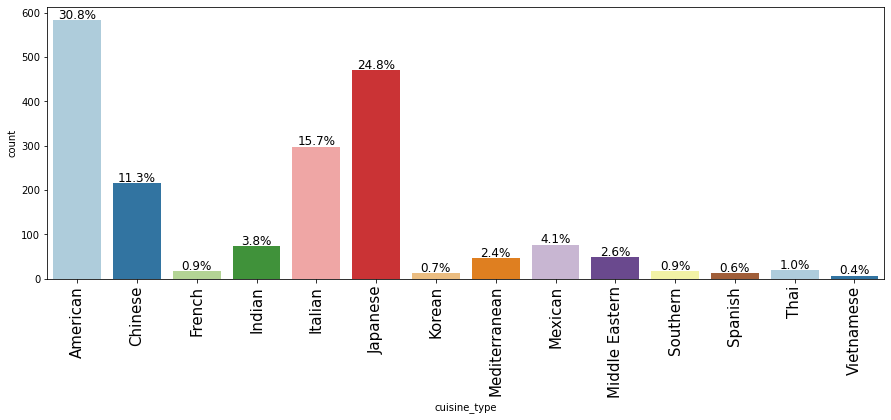

In [12]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'cuisine_type', perc=True)

**Observations**
* The top 3 cuisine orders are:
* American - 30.8%, Japanese - 24.8% and Italian - 15.7%.

<Figure size 720x504 with 0 Axes>

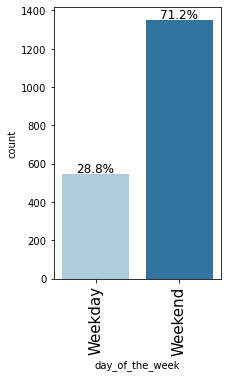

In [13]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'day_of_the_week', perc=True)

**Observations**
* Maximum orders are placed during Weekends.

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [14]:
df_r=df['restaurant_name'].value_counts()
df_r.head(5) #shows top5 restaurants

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
* The top 5 restaurants that have received the highest number of orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm.

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [15]:
data=df[df['day_of_the_week']=='Weekend']
data['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
* The most popular cuisine on weekends is American

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [16]:
data1=df[df['cost_of_the_order']>20]
data1

order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
3      1477334       106968              Blue Ribbon Fried Chicken   
5      1477224       147468                       Tamarind TriBeCa   
12     1476966       129969              Blue Ribbon Fried Chicken   
17     1477373       139885              Blue Ribbon Sushi Izakaya   
...        ...          ...                                    ...   
1884   1477437       304993                            Shake Shack   
1885   1477550        97324                            Shake Shack   
1892   1477473        97838                            Han Dynasty   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1895   1477819        35309                      Blue Ribbon Sushi   

     cuisine_type  cost_of_the_order day_of_the_week     rating  \
0          Korean              30.75         Weekend  Not given   
3        American              29.20         Weekend          3   
5          Indian              25.22         Weekday          3   
12       American              24.30         Weekend          5   
17       Japanese              33.03         Weekend  Not given   
...           ...                ...             ...        ...   
1884     American              31.43         Weekend          3   
1885     American              29.05         Weekday          4   
1892      Chinese              29.15         Weekend  Not given   
1893      Mexican              22.31         Weekend          5   
1895     Japanese              25.22         Weekday  Not given   

      food_preparation_time  delivery_time  
0                        25             20  
3                        25             15  
5                        20             24  
12                       23             17  
17                       21             22  
...                     ...            ...  
1884                     31             24  
1885                     27             29  
1892                     29             21  
1893                     31             17  
1895                     31             24  

[555 rows x 9 columns]

In [17]:
class Percent:
    def init_vals (self,val2):
        self.df1=555
        self.df=val2
    def percentage(self):
        return round(self.df1 / self.df * 100, 2)
calc_percent=Percent()
calc_percent.init_vals(1898)
#print(calc_percent.df1)
print(calc_percent.percentage())    

29.24


#### Observations:
* From the observation we derive that 555 orders is above 20 dollars
* The percentage of such orders in the dataset is 29.24 against the entire set of data.

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [18]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
* From the dataset the mean value of delivery_time is 24.16

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [19]:
df['cost_of_the_order'].max() #returns maximum value from the cost_of_the_order variable
df[df.cost_of_the_order == 35.41]

order_id  customer_id restaurant_name   cuisine_type  cost_of_the_order  \
573   1477814        62359           Pylos  Mediterranean              35.41   

    day_of_the_week rating  food_preparation_time  delivery_time  
573         Weekday      4                     21             29

#### Observations:
* From the observation the customer with the customer_id=62359 has spent amount 35.41 dollars by ordering Mediterranean cuisine therefore this customer will get a free coupon of 15 dollars

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

### Correlation

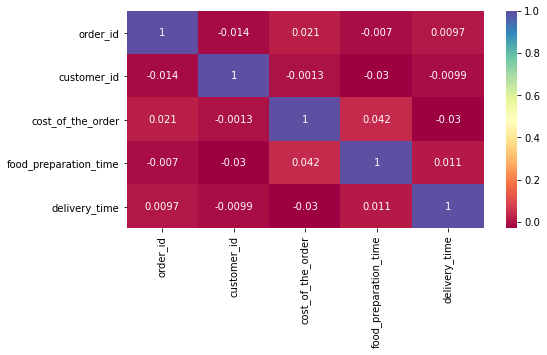

In [20]:
# Checking correlation among numerical variables
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(),annot=True, cmap="Spectral");

**Observations**
* Delivery time & cost of the order is negatively correlated

### Bivariate scatter plots

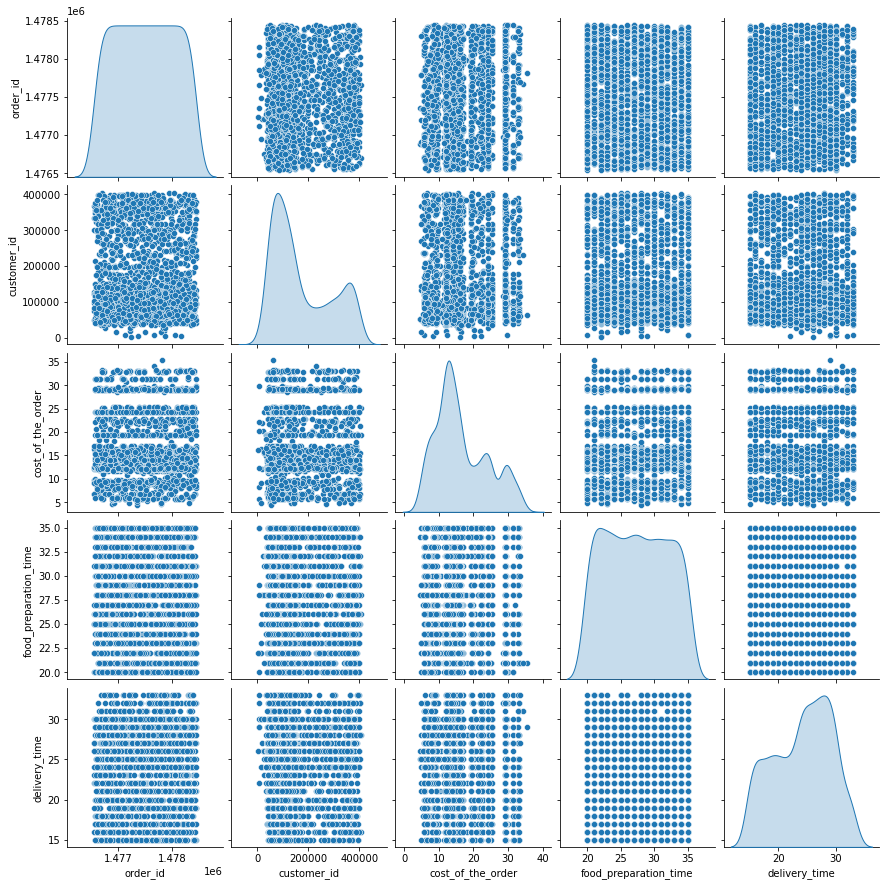

In [21]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

**Observations**
* We get the same insights from the correlation plot

### Relationship between day_of_the_week and delivery_time 

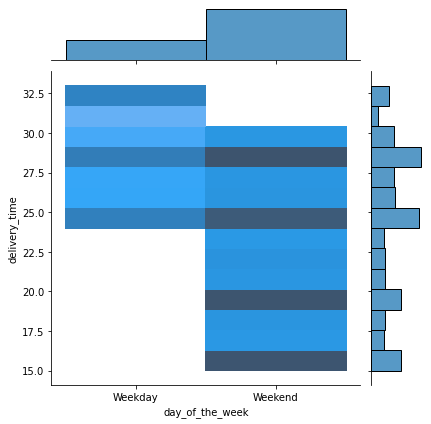

In [22]:
sns.jointplot(df['day_of_the_week'], df['delivery_time'], kind="hist");

**Observations**
* Delivery time is more on weekdays compared to weekends.

### Relationship between cuisine_type and delivery_time with respect to day_of_the_week

(array([  0., 250., 500.]), [])

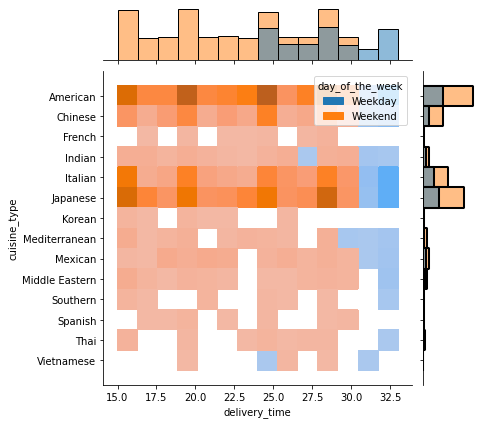

In [23]:
sns.jointplot(df['delivery_time'], df['cuisine_type'], hue=df['day_of_the_week'], kind="hist");
plt.xticks(rotation=45)

**Observations**
* Very few customers prefer to order Vietnamese cuisine on both weekends & weekdays.
* Minimum time taken to deliver Vietnamese food is around 25 minutes.
* Korean food takes less delivery time compared to other cuisines.

### Relationship between cuisine_type and food_preparation_time with respect to day_of_the_week

(array([  0., 250., 500.]), [])

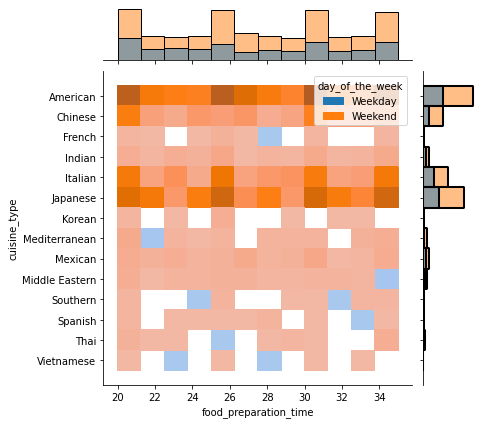

In [24]:
sns.jointplot(df['food_preparation_time'], df['cuisine_type'], hue=df['day_of_the_week'], kind="hist");
plt.xticks(rotation=45)

**Observations**
* The food preparation time ranges from 20 to 35 minutes for most of the cuisine types both on weekdays and weekends.

### Relationship between cuisine_type and cost_of_the_order

(array([   0.,  500., 1000.]), [])

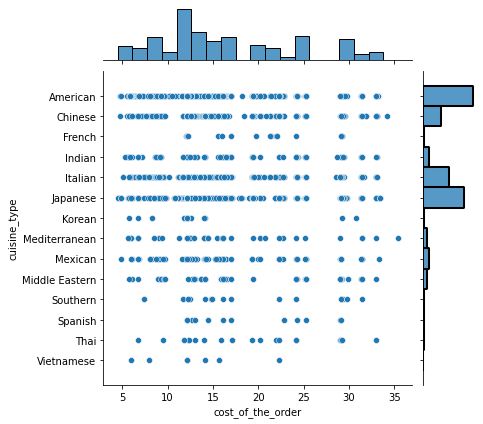

In [25]:
sns.jointplot(df['cost_of_the_order'], df['cuisine_type']);
plt.xticks(rotation=45)

**Observations**
* The cost of Vietnamese food is less compared to other cuisines
* The cost of French and spanish food is expensive where the starting price of food is more compared to other cuisines.

(array([18., 20., 22., 24., 26., 28., 30., 32., 34., 36.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

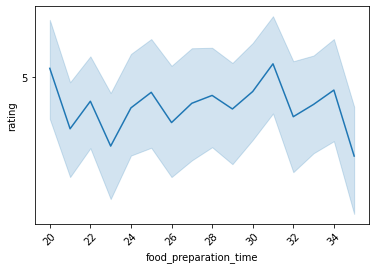

In [26]:
sns.lineplot(df['food_preparation_time'], df['rating']);
plt.xticks(rotation=45)

**Observations**
* Food preparation time is not correlated to rating

(array([12.5, 15. , 17.5, 20. , 22.5, 25. , 27.5, 30. , 32.5, 35. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

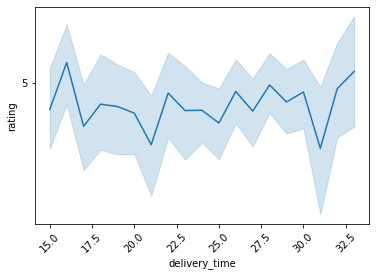

In [27]:
sns.lineplot(df['delivery_time'], df['rating']);
plt.xticks(rotation=45)

**Observations**
* Delivery time is correlated to rating.

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [28]:
data = df[df['rating'] != 'Not given'].copy()
data['rating'] = data['rating'].astype('int')#converting into int
data1 = data.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
data1.head()
#to get the restaurant names that have rating count more than 50
restnames =data1[data1['rating'] > 50]['restaurant_name']
# filter the data of restaurants that have rating count more than 50
data2 = data[data['restaurant_name'].isin(restnames)].copy()
# finding the mean rating of the restaurants
data2.groupby(data2['restaurant_name'].cat.remove_unused_categories())['rating'].mean().sort_values(ascending = False).reset_index()


restaurant_name    rating
0          The Meatball Shop  4.511905
1  Blue Ribbon Fried Chicken  4.328125
2                Shake Shack  4.278195
3          Blue Ribbon Sushi  4.219178

#### Observations:
* The restaurants fulfilling the criteria to get the promotional offer are The Meatball shop, Blue Ribbon Fried Chicken, shake shack, Blue Ribbon Sushi

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [29]:

df['foodhub_charge'] = [order_cost * 0.25 if order_cost > 20 else
                        order_cost * 0.15 if order_cost > 5 else
                      0
                       for order_cost in df['cost_of_the_order']]
#printing the net revenue

print('The net revenue is around', round(df['foodhub_charge'].sum(), 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:
* The net revenue is around 6166.3 dollars

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [30]:
a=df['food_preparation_time']
b=df['delivery_time']
df['total_time']=a + b #total_delivery_time
df['total_time'] #total_delivery_time of complete dataset

0       45
1       48
2       51
3       40
4       49
        ..
1893    48
1894    50
1895    55
1896    54
1897    52
Name: total_time, Length: 1898, dtype: int64

In [31]:
d=df['total_time'][df['total_time']>60]
d #total_delivery_time>60

7       63
10      62
19      61
24      61
54      64
        ..
1869    61
1873    63
1875    65
1880    62
1889    63
Name: total_time, Length: 200, dtype: int64

In [32]:
class Percent:
    def init_vals (self,val2):
        self.d=200
        self.c=val2
    def percentage(self):
        return round(self.d / self.c * 100, 2)
calc_percent=Percent()
calc_percent.init_vals(1898)
#print(calc_percent.df1)
print(calc_percent.percentage())    

10.54


#### Observations:
* 10.54% orders have more than 60 minutes of total delivery time

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [33]:
df1=df[df['day_of_the_week']=='Weekday']
df1['delivery_time'].mean()

28.340036563071298

In [34]:
df2=df[df['day_of_the_week']=='Weekend']
df2['delivery_time'].mean()

22.4700222057735

#### Observations:
* The mean delivery time on weekdays is 28.34
* The mean delivery time on weekends is 22.47

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (5 marks)

### Conclusion
#### Insights:
The dataset has 1162 customers who have rated where as 736 orders were not rated from different restaurants from the overall dataset which has 1898 customers in total,  The key for this data reference is restaurant name & cuisine type. From the business perspective some of the restaurants are not performing well and further analysis must be done. 

From the observation, we can conclude the following:
1. Overall rating for the restaurants starts from 3 and goes until 5.
2. Many customers are ordering food during weekends and the ratings are high during weekends compared to weekdays.
3. Most of the customers prefer to order American cuisine among other cuisine types.
4. Maximum number of orders are placed in these restaurants which are top 5 restaurants with maximum ratings, and they are:
 * Shake Shack                  
 * The Meatball Shop             
 * Blue Ribbon Sushi             
 * Blue Ribbon Fried Chicken     
 * Parm
5. In the top 5 restaurants given , many customers prefer to order American,Japanese & Italian.
6. The bottom 5 preferred cuisine types are Vietnamese, Spanish ,Thai, Korean and French.

### Business Recommendation 

1. Weekend orders are high and by this analysis we need to ensure that there are more delivery person available to deliver the orders even more quicker, by this we can get more rating from the customers
2. The bottom 5 preferred cuisines can be ruled out from the app if not performing well, or gather more data in terms of cost vs profit to take further decisions.
3. The top 5 restaurants which are performing well can give more discount to attract more customers
4. Though the number of orders are less during weekdays more time is taken to deliver the food when compared with weekends and hence over here analysis must be done.

In [35]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
# to save report obtained via pandas profiling
prof.to_file(output_file='output.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]